## Create RFM scores from K-means

In [38]:
# Import libraries
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler  <--  this is to normalize data before applying Kmeans
from sklearn.cluster import KMeans

%matplotlib ipympl


In [39]:
# Import rfm_values
rfm = pd.read_csv(r'C:\Users\argyr\OneDrive\Υπολογιστής\Diplvm\Giftware dataset\rfm_values.csv')
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,432.0,34.0,368.36
1,12347,3.0,222.0,4921.53
2,12348,76.0,51.0,2019.40
3,12349,19.0,179.0,4419.49
4,12350,311.0,17.0,334.40


### Create RFM score using *qcut()* function

In [8]:
# Calculate RFM scores
# Using pd.qcut() categorize each customer into 5 bins based on their value in each one of the metrics R,F,M
rfm["Recency_Score"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm["Frequency_Score"]= pd.qcut(rfm["Frequency"], 5, labels = [1, 2, 3, 4, 5])
rfm["Monetary_Score"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm.head()

,Customer ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,12346,432.0,34.0,368.36,1,2,2
1,12347,3.0,222.0,4921.53,5,5,5
2,12348,76.0,51.0,2019.40,3,3,4
3,12349,19.0,179.0,4419.49,5,4,5
4,12350,311.0,17.0,334.40,2,1,2


In [9]:
rfm["RFM_Score"] = rfm["Recency_Score"].astype(str) + rfm["Frequency_Score"].astype(str) + rfm["Monetary_Score"].astype(str)
rfm.head()

,Customer ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,12346,432.0,34.0,368.36,1,2,2,122
1,12347,3.0,222.0,4921.53,5,5,5,555
2,12348,76.0,51.0,2019.40,3,3,4,334
3,12349,19.0,179.0,4419.49,5,4,5,545
4,12350,311.0,17.0,334.40,2,1,2,212


In [10]:
rfmdata = rfm.to_csv(r'C:\Users\argyr\OneDrive\Υπολογιστής\Diplvm\Giftware dataset\rfm_data_ipynb.csv', index=False)

### Create RFM scores using *K-means* algorithm

In [40]:
# The code below is kmeans Python code for Power BI.
# We can run it in Power BI and in Jupyter and come up with the scores individually.
# If the process was deterministic, i.e. if the k centers of the k clusters were not 
# initialised randomly, then there would be no problem, since the same code would produce
# the same results in each tool. But the clusters are indeed initialised randomly.
# ...
# We could try to run this code at each tool and try to "sync" their results, but this would take time. 
# Instead we will produce the results here (they may as well had been produced in Power BI),
# and feed the produced dataset to Power BI, as if *it* had produced them, which is perfectly capable of,
# and which we would, if only for the randomness inherent to kmeans.
#
# The other problem is that since the process is random: which is the correct clustering?
# Run if for N times and take that which is the most frequent.

In [41]:
def my_iterative_kmeans(rfm, rfm_column_name, num_runs, n_clusters):
        
    uids = []
    rfms = []
    
    # python produces 0:4 labels, we want 1:5
    labels_mapping = {0:1, 1:2, 2:3, 3:4, 4:5}
    
    for i in range(num_runs):
        # The following two lines are the essence of Kmeans
        # After appropriate renamings these two lines constitute the code that should run in Power BI
        kmeans = KMeans(n_clusters=n_clusters).fit(rfm[[rfm_column_name]])
        rfm[rfm_column_name+'_clustered'] = kmeans.labels_
        
        # https://stackoverflow.com/questions/44888415/how-to-set-k-means-clustering-labels-from-highest-to-lowest-with-python
        idx = np.argsort(kmeans.cluster_centers_.sum(axis=1))
        lut = np.zeros_like(idx)
        lut[idx] = np.arange(n_clusters)
        
        # Map from 0-4 to 1-5
        lut[kmeans.labels_] = [labels_mapping[i] for i in lut[kmeans.labels_]]
        rfm[rfm_column_name+'_clustered'] = [labels_mapping[i] for i in rfm[rfm_column_name+'_clustered']]

        uid = [sum(lut[kmeans.labels_] == 1), 
               sum(lut[kmeans.labels_] == 2), 
               sum(lut[kmeans.labels_] == 3), 
               sum(lut[kmeans.labels_] == 4), 
               sum(lut[kmeans.labels_] == 5)],
              
        uids.append(''.join(str(uid)))
        rfms.append(rfm)
        
    return uids,rfms

In [42]:
# Run 5-means ntimes for each column

ntimes = 1000
nclusters = 5

mik_r = my_iterative_kmeans(rfm, 'Recency',   ntimes, nclusters)
mik_f = my_iterative_kmeans(rfm, 'Frequency', ntimes, nclusters)
mik_m = my_iterative_kmeans(rfm, 'Monetary',  ntimes, nclusters)

# counts
counts_r = {}
counts_f = {}
counts_m = {}

for i in mik_r[0]:
  counts_r[i] = (counts_r[i] + 1) if (i in counts_r) else 1
for i in mik_f[0]:
  counts_f[i] = (counts_f[i] + 1) if (i in counts_f) else 1
for i in mik_m[0]:
  counts_m[i] = (counts_m[i] + 1) if (i in counts_m) else 1

In [43]:
[counts_r, counts_f, counts_m]

[{'([2864, 763, 592, 1029, 600],)': 147,
  '([2874, 758, 587, 1029, 600],)': 214,
  '([2680, 848, 691, 1029, 600],)': 2,
  '([2818, 772, 629, 1029, 600],)': 14,
  '([2824, 783, 612, 1028, 601],)': 47,
  '([2796, 785, 638, 1029, 600],)': 21,
  '([2856, 757, 606, 1028, 601],)': 19,
  '([2824, 770, 625, 1029, 600],)': 18,
  '([2824, 783, 612, 1029, 600],)': 143,
  '([2824, 776, 619, 1029, 600],)': 71,
  '([2581, 916, 719, 1031, 601],)': 20,
  '([2856, 757, 606, 1029, 600],)': 24,
  '([2856, 766, 597, 1029, 600],)': 56,
  '([2824, 776, 619, 1028, 601],)': 35,
  '([2722, 837, 660, 1029, 600],)': 12,
  '([2796, 778, 645, 1023, 606],)': 1,
  '([2784, 782, 653, 1029, 600],)': 3,
  '([2796, 785, 638, 1028, 601],)': 15,
  '([2856, 766, 597, 1028, 601],)': 17,
  '([2796, 778, 645, 1029, 600],)': 11,
  '([2784, 782, 653, 1028, 601],)': 2,
  '([2701, 844, 674, 1029, 600],)': 1,
  '([2581, 916, 719, 1032, 600],)': 6,
  '([2824, 776, 619, 1023, 606],)': 6,
  '([2836, 777, 606, 1028, 601],)': 11,
  '(

In [44]:
# find uid with max counts
# max(counts_r, key=counts_r.get)
# This gives the string located in `uids` that is most frequent
# https://stackoverflow.com/a/280156

# We want to obtain one such clustering that is stored in the mik_*[1] element of the `my_iterative_kmeans` return object.
# These are the rid, fid, and mids
# https://stackoverflow.com/a/176921
rid = mik_r[0].index(max(counts_r, key=counts_r.get))
fid = mik_f[0].index(max(counts_f, key=counts_f.get))
mid = mik_m[0].index(max(counts_m, key=counts_m.get))

# These clusterings are saved here:
# mik_r[1][rid]
# mik_f[1][fid]
# mik_m[1][mid]

In [46]:
rfm2 = rfm[["Customer ID", "Recency", "Frequency", "Monetary", "Recency_clustered", "Frequency_clustered", "Monetary_clustered"]]
rfm2.head(5)

,Customer ID,Recency,Frequency,Monetary,Recency_clustered,Frequency_clustered,Monetary_clustered
0,12346,432.0,34.0,368.36,2,1,1
1,12347,3.0,222.0,4921.53,4,5,1
2,12348,76.0,51.0,2019.40,4,1,1
3,12349,19.0,179.0,4419.49,4,1,1
4,12350,311.0,17.0,334.40,5,1,1


## Make scores ascending in order

In [301]:
# The problem as you can see in the three sections below is that the maximum score does not correspond to the highest
# quantile percent, e.g. Monetary label 5 does not correspond to the maximum cluster of monetary values. What we have to do
# is make the ordering ascending for all three variables. 

In [326]:
r1 = rfm2.groupby(["Recency_clustered"], as_index=False).agg(
                            {"Recency": lambda x :x.mean()})
r1.head()

,Recency_clustered,Recency
0,1,127.694146
1,2,422.684159
2,3,625.860000
3,4,28.208303
4,5,261.531818


In [327]:
r2 = rfm2.groupby(["Frequency_clustered"], as_index=False).agg(
                            {"Frequency": lambda x :x.mean()})
r2.head()

,Frequency_clustered,Frequency
0,1,57.598563
1,2,4722.125000
2,3,1145.780303
3,4,12122.500000
4,5,367.391148


In [328]:
r3 = rfm2.groupby(["Monetary_clustered"], as_index=False).agg(
                            {"Monetary": lambda x :x.mean()})
r3.head()

,Monetary_clustered,Monetary
0,1,1381.244328
1,2,231977.796000
2,3,75638.912593
3,4,551473.690000
4,5,14524.468981


## Correct scores

# MAKE SURE TO REPEATEDLY RUN THE THREE CELLS BELOW UNTIL THEY ARE CORRECT

In [333]:
# Run this cell repeatedly until you get an ascending order, e.g.
# Recency_clustered	Recency
# 0 	2	127.694146
# 1 	4	422.684159
# 2 	5	625.860000
# 3 	1	28.208303
# 4 	3	261.531818
# Then move to the next cell below

r1_map = r1["Recency"].argsort()+1
r1_map = r1_map*10

for i in range(len(r1_map)):
    r1['Recency_clustered'].replace(i+1, r1_map[i], inplace=True)

for j in range(len(r1_map)):
    r1['Recency_clustered'].replace(10*(j+1),j+1, inplace=True)
    

# observe correct mapping    
r1.head()

,Recency_clustered,Recency
0,2,127.694146
1,4,422.684159
2,5,625.860000
3,1,28.208303
4,3,261.531818


In [334]:
# e.g should eventually be
# Recency_clustered	Recency
# 0 	4	127.694146
# 1 	2	422.684159
# 2 	1	625.860000
# 3 	5	28.208303
# 4 	3	261.531818

for i in range(len(r1_map)):
    r1['Recency_clustered'].replace(i+1, 10*(i+1), inplace=True)

r1['Recency_clustered'].replace(10,5, inplace=True)
r1['Recency_clustered'].replace(20,4, inplace=True)
r1['Recency_clustered'].replace(30,3, inplace=True)
r1['Recency_clustered'].replace(40,2, inplace=True)
r1['Recency_clustered'].replace(50,1, inplace=True)

# observe correct mapping    
r1.head()

,Recency_clustered,Recency
0,4,127.694146
1,2,422.684159
2,1,625.860000
3,5,28.208303
4,3,261.531818


In [336]:
r2_map = r2["Frequency"].argsort()+1
r2_map = r2_map*10

for i in range(len(r2_map)):
    r2['Frequency_clustered'].replace(i+1, r2_map[i], inplace=True)

    
for j in range(len(r2_map)):
    r2['Frequency_clustered'].replace(10*(j+1),j+1, inplace=True)


# observe correct mapping    
r2.head()

,Frequency_clustered,Frequency
0,1,57.598563
1,4,4722.125000
2,3,1145.780303
3,5,12122.500000
4,2,367.391148


In [338]:
r3_map = r3["Monetary"].argsort()+1
r3_map = r3_map*10
    
for i in range(len(r3_map)):
    r3['Monetary_clustered'].replace(i+1, r3_map[i], inplace=True)

    
for j in range(len(r3_map)):
    r3['Monetary_clustered'].replace(10*(j+1),j+1, inplace=True)

# observe correct mapping    
r3.head()

,Monetary_clustered,Monetary
0,1,1381.244328
1,4,231977.796000
2,3,75638.912593
3,5,551473.690000
4,2,14524.468981


In [339]:
rfm2.head()

,Customer ID,Recency,Frequency,Monetary,Recency_clustered,Frequency_clustered,Monetary_clustered
0,12346,432.0,34.0,368.36,2,1,1
1,12347,3.0,222.0,4921.53,4,5,1
2,12348,76.0,51.0,2019.40,4,1,1
3,12349,19.0,179.0,4419.49,4,1,1
4,12350,311.0,17.0,334.40,5,1,1


In [352]:
rfm3 = rfm2.copy()
for i in range(len(r3_map)):
    rfm3['Recency_clustered'].replace(i+1,   10*r1["Recency_clustered"][i],   inplace=True)
    rfm3['Frequency_clustered'].replace(i+1, 10*r2["Frequency_clustered"][i], inplace=True)
    rfm3['Monetary_clustered'].replace(i+1,  10*r3["Monetary_clustered"][i],  inplace=True)
    
for i in range(len(r3_map)):
    rfm3['Recency_clustered'].replace(10*(i+1),   i+1, inplace=True)
    rfm3['Frequency_clustered'].replace(10*(i+1), i+1, inplace=True)
    rfm3['Monetary_clustered'].replace(10*(i+1),  i+1, inplace=True)    
    
rfm3.head()

,Customer ID,Recency,Frequency,Monetary,Recency_clustered,Frequency_clustered,Monetary_clustered
0,12346,432.0,34.0,368.36,2,1,1
1,12347,3.0,222.0,4921.53,5,2,1
2,12348,76.0,51.0,2019.40,5,1,1
3,12349,19.0,179.0,4419.49,5,1,1
4,12350,311.0,17.0,334.40,3,1,1


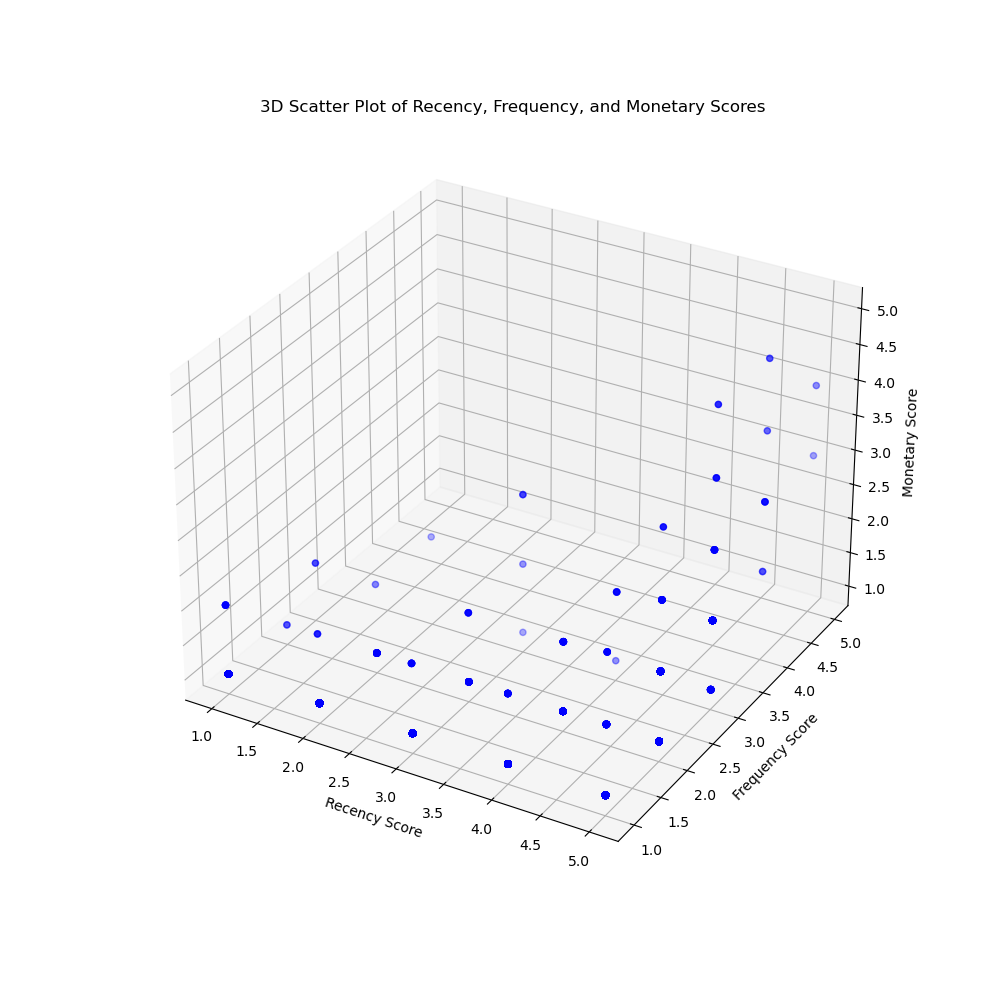

In [353]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(rfm3['Recency_clustered'], rfm3['Frequency_clustered'], rfm3['Monetary_clustered'], c='b', marker='o')

# Set labels
ax.set_xlabel('Recency Score')
ax.set_ylabel('Frequency Score')
ax.set_zlabel('Monetary Score')

# Set title
ax.set_title('3D Scatter Plot of Recency, Frequency, and Monetary Scores')

plt.show()

In [354]:
# Initialize columns
cols_concat = ['Recency_clustered', 'Frequency_clustered', 'Monetary_clustered']

# Convert them to type str
rfm4 = rfm3.copy()
rfm4[cols_concat] = rfm4[cols_concat].astype('str')

# Then concatenate them as follows
rfm4['score'] = rfm4[cols_concat].T.agg(''.join).astype('int')

# Return to int
rfm4[cols_concat] = rfm4[cols_concat].astype('int')

In [361]:
rfm4.head(10)

,Customer ID,Recency,Frequency,Monetary,Recency_clustered,Frequency_clustered,Monetary_clustered,score
0,12346,432.0,34.0,368.36,2,1,1,211
1,12347,3.0,222.0,4921.53,5,2,1,521
2,12348,76.0,51.0,2019.40,5,1,1,511
3,12349,19.0,179.0,4419.49,5,1,1,511
4,12350,311.0,17.0,334.40,3,1,1,311
5,12351,376.0,21.0,300.93,2,1,1,211
6,12352,37.0,107.0,1889.21,5,1,1,511
7,12353,205.0,24.0,406.76,3,1,1,311
8,12354,233.0,58.0,1079.40,3,1,1,311
9,12355,215.0,35.0,947.61,3,1,1,311


In [356]:
rfmdata_clustered = rfm4.to_csv(r'C:\Users\argyr\OneDrive\Υπολογιστής\Diplvm\Giftware dataset\rfm_scores_via_kmeans.csv', index=False)

In [357]:
# how many different scores are there?
# in other words: how many different labels are there in total?
rfm4['score'].nunique()

40

In [358]:
print("Recency:  (%d,%d,%d,%d,%d)" % (sum(rfm4['Recency_clustered'] == 1),sum(rfm4['Recency_clustered'] == 2),sum(rfm4['Recency_clustered'] == 3),sum(rfm4['Recency_clustered'] == 4),sum(rfm4['Recency_clustered'] == 5)))
print("Frequency:(%d,%d,%d,%d,%d)" % (sum(rfm4['Frequency_clustered'] == 1),sum(rfm4['Frequency_clustered'] == 2),sum(rfm4['Frequency_clustered'] == 3),sum(rfm4['Frequency_clustered'] == 4),sum(rfm4['Frequency_clustered'] == 5)))
print("Monetary: (%d,%d,%d,%d,%d)" % (sum(rfm4['Monetary_clustered'] == 1),sum(rfm4['Monetary_clustered'] == 2),sum(rfm4['Monetary_clustered'] == 3),sum(rfm4['Monetary_clustered'] == 4),sum(rfm4['Monetary_clustered'] == 5)))

Recency:  (600,1029,660,837,2722)
Frequency:(4870,836,132,8,2)
Monetary: (5490,324,27,5,2)
